### 1.1. Figure and Axes

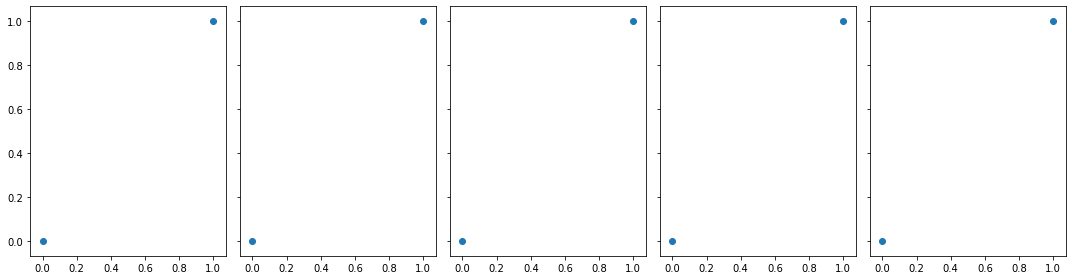

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 5  # 일단 5개로 시작합니다.
fig, axes = plt.subplots(ncols=N, figsize=(3*N, 4), sharey=True)  # 3x4 크기 그림을 나열합니다.

for i, ax in enumerate(axes):
    ax.scatter([0,1], [0,1])  # dummy data입니다.

plt.tight_layout()    
plt.show()

### 1.2. Data

#### 1.2.1 Data to Color, Color to Lightness

In [3]:
from matplotlib import cm

cmap = "Blues_r"
blues_r = cm.get_cmap(cmap)
print(type(blues_r))

<class 'matplotlib.colors.LinearSegmentedColormap'>


In [4]:
print(blues_r(0.5))
print(type(blues_r(0.5)))

(0.42274509803921567, 0.684075355632449, 0.8398923490965013, 1.0)
<class 'tuple'>


In [5]:
print(blues_r([0, 0.2, 0.4, 0.6, 0.8, 1]))
print(type(blues_r([0, 0.2, 0.4, 0.6, 0.8, 1])))

[[0.03137255 0.18823529 0.41960784 1.        ]
 [0.09019608 0.39294118 0.67058824 1.        ]
 [0.29098039 0.5945098  0.78901961 1.        ]
 [0.57960784 0.77019608 0.87372549 1.        ]
 [0.81411765 0.88392157 0.94980392 1.        ]
 [0.96862745 0.98431373 1.         1.        ]]
<class 'numpy.ndarray'>


In [6]:
print(blues_r([0, 0.2, 0.4, 0.6, 0.8, 1])[np.newaxis, :, :3])

[[[0.03137255 0.18823529 0.41960784]
  [0.09019608 0.39294118 0.67058824]
  [0.29098039 0.5945098  0.78901961]
  [0.57960784 0.77019608 0.87372549]
  [0.81411765 0.88392157 0.94980392]
  [0.96862745 0.98431373 1.        ]]]


In [7]:
from colorspacious import cspace_converter

rgb = blues_r([0, 0.2, 0.4, 0.6, 0.8, 1])[:, :3]
lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

print(lab)
print(type(lab))

[[ 22.18014584  -6.42929944 -23.01729555]
 [ 42.46541635 -10.62409381 -25.68722564]
 [ 61.34976829 -13.77753277 -21.06338743]
 [ 78.52932851 -11.90227692 -14.08646179]
 [ 90.10413892  -5.7820838   -9.58766874]
 [ 98.62348915  -2.92558943  -3.50908208]]
<class 'numpy.ndarray'>


#### 1.2.2. Plot Lightness of Data

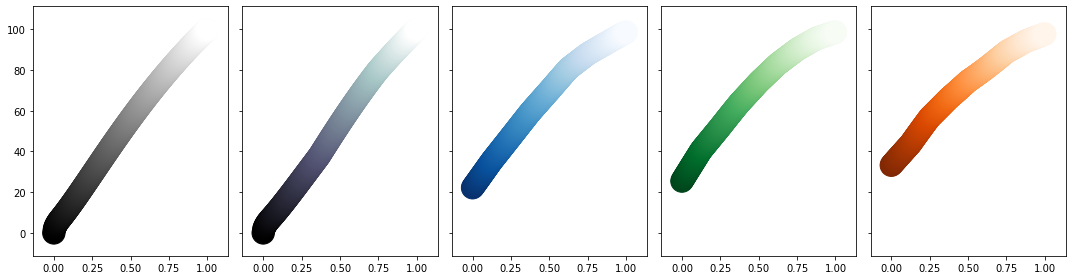

In [8]:
x = np.linspace(0.0, 1.0, 256) # 표현할 data를 0~1까지 256단계로 만듬

cmaps = ["gist_gray", "bone", "Blues_r", "Greens_r", "Oranges_r"]  # 표현할 컬러맵 리스트
N = len(cmaps)  # 입력받는 cmap 수에 따라 변경되도록 수정

fig, axes = plt.subplots(ncols=N, figsize=(3*N, 4), sharey=True)

for ax, cmap in zip(axes, cmaps): # axes마다 다른 cmap 적용
                                  # cmaps를 함께 받도록 zip() 사용
    
    rgb = cm.get_cmap(cmap)(x)[:, :3]
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)  # RGB 색상을 CIELAB으로 변경
    y = lab[:, 0]                                     # Lightness만 추출
    ax.scatter(x, y, c=x, cmap=cmap, s=500)           # plot data as colormap
                                                      # x : 0~1까지의 데이터
                                                      # y : 선택된 컬러맵에서 x에 해당하는 명도 
                                                      # c : x를 색상으로 표현 
                                                      # cmap : 입력받은 cmap 적용

plt.tight_layout()    
plt.savefig("25_ccmap_code_03.png")
plt.show()

### 1.3. Controlling Figure Aesthetics

#### 1.3.1. Axes Aesthetics

##### 1.3.1.1. Larger ticklabels

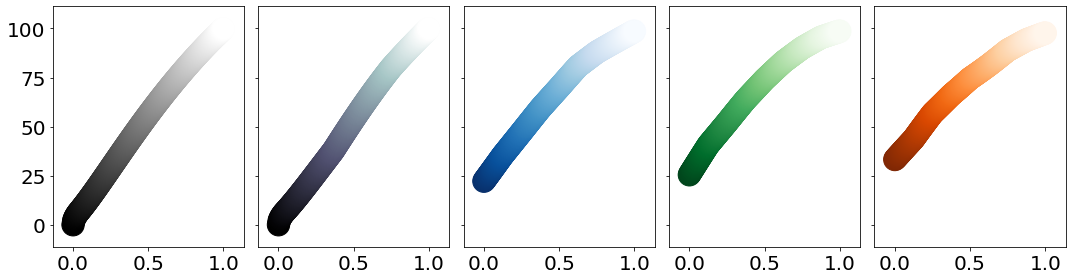

In [9]:
x = np.linspace(0.0, 1.0, 256) 

cmaps = ["gist_gray", "bone", "Blues_r", "Greens_r", "Oranges_r"] 
N = len(cmaps) 

fig, axes = plt.subplots(ncols=N, figsize=(3*N, 4), sharey=True)

for ax, cmap in zip(axes, cmaps):    
    rgb = cm.get_cmap(cmap)(x)[:, :3]
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
    y = lab[:, 0]                                    
    ax.scatter(x, y, c=x, cmap=cmap, s=500)      
    
    ax.xaxis.set_tick_params(labelsize=20) # x축 눈금 글꼴 키우기
    ax.yaxis.set_tick_params(labelsize=20) # y축 눈금 글꼴 키우기
                                                     
plt.tight_layout()  
plt.savefig("25_ccmap_code_04.png")
plt.show()

##### 1.3.1.2. Needless Spines Removal
##### 1.3.1.3. $y$-label Placement
##### 1.3.1.4. Grids On

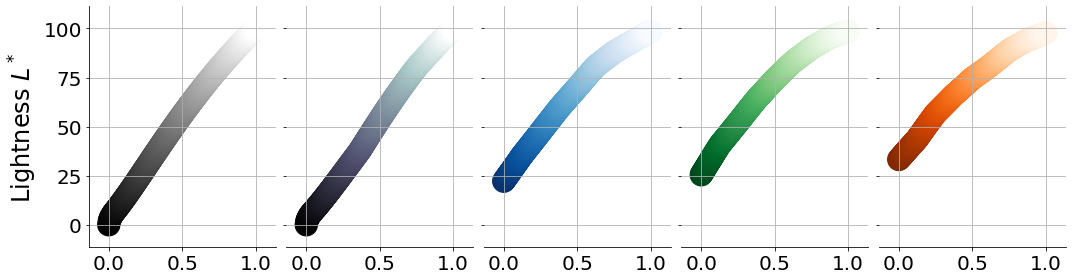

In [10]:
x = np.linspace(0.0, 1.0, 256) 

cmaps = ["gist_gray", "bone", "Blues_r", "Greens_r", "Oranges_r"] 
N = len(cmaps) 

fig, axes = plt.subplots(ncols=N, figsize=(3*N, 4), sharey=True)

for i, (ax, cmap) in enumerate(zip(axes, cmaps)):  # enumerate 도입
    rgb = cm.get_cmap(cmap)(x)[:, :3]
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
    y = lab[:, 0]                                    
    ax.scatter(x, y, c=x, cmap=cmap, s=500)      
    
    ax.xaxis.set_tick_params(labelsize=20) 
    ax.yaxis.set_tick_params(labelsize=20) 
    ax.spines['top'].set_visible(False)    # 위쪽 spine 없애기
    ax.spines['right'].set_visible(False)  # 오른쪽 spine 없애기
    ax.grid("on")                          # grid 보이기
    
    if i == 0:
        ax.set_ylabel("Lightness $L^*$", fontdict={"fontsize":24})  # y-label 달기
    else:
        ax.spines['left'].set_visible(False)  # 2번째 이후 왼쪽 spine 없애기
                                                     
plt.tight_layout()  
plt.savefig("25_ccmap_code_05.png")
plt.show()

##### 1.3.1.5. Axes Movement
##### 1.3.1.6. Title Placement

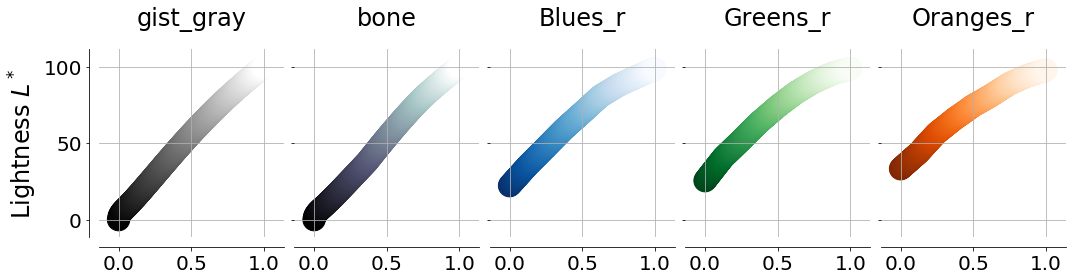

In [11]:
x = np.linspace(0.0, 1.0, 256) 

cmaps = ["gist_gray", "bone", "Blues_r", "Greens_r", "Oranges_r"] 
N = len(cmaps) 

fig, axes = plt.subplots(ncols=N, figsize=(3*N, 4), sharey=True)

for i, (ax, cmap) in enumerate(zip(axes, cmaps)):  
    rgb = cm.get_cmap(cmap)(x)[:, :3]
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
    y = lab[:, 0]                                    
    ax.scatter(x, y, c=x, cmap=cmap, s=500)  
    
    ax.xaxis.set_tick_params(labelsize=20) 
    ax.yaxis.set_tick_params(labelsize=20) 
    ax.set_title(cmap, fontdict={"fontsize":24}, pad=24)  # title 달기
    ax.spines['top'].set_visible(False)    
    ax.spines['right'].set_visible(False)  
    ax.spines['bottom'].set_position(('outward', 10))  # spine 아래쪽으로 이동
    ax.grid("on")                          
    
    if i == 0:
        ax.set_ylabel("Lightness $L^*$", fontdict={"fontsize":24})
        ax.spines['left'].set_position(('outward', 10))  # spine 왼쪽으로 이동
    else:
        ax.spines['left'].set_visible(False)
                                                     
plt.tight_layout()  
plt.savefig("25_ccmap_code_06.png")
plt.show()

#### 1.3.2. Scatter Aesthetics

In [12]:
def plot_L(cmaps, titles=None, filename=None):
    N = len(cmaps)
    assert N > 0  # 최소한 1개의 컬러맵이 있어야 함.
    
    if titles==None:  # titles 입력이 없으면 cmap 이름을 title로 사용
        titles = [str(cmap) for cmap in cmaps]  # string이 아닐 경우를 대비해 string으로 변환
    
    if filename==None: # filename 입력이 없으면 cmap 명단을 이름으로 사용
        filename = "L_" + "_".join(titles) + ".png"

    x = np.linspace(0.0, 1.0, 256) 
    
    fig, axes = plt.subplots(ncols=N, figsize=(3*N, 4), sharey=True)

    for i, (ax, cmap) in enumerate(zip(axes, cmaps)):  
        rgb = cm.get_cmap(cmap)(x)[:, :3]
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        y = lab[:, 0]                                    
        ax.scatter(x, y, c=x, cmap=cmap, s=500, zorder=3)  # Data
        ax.scatter(x, y, c="k", s=550, zorder=2)           # outline
        ax.plot(x, y, c="k", zorder=4)                     # center line

        ax.xaxis.set_tick_params(labelsize=20) 
        ax.yaxis.set_tick_params(labelsize=20) 
        ax.set_title(cmap, fontdict={"fontsize":24}, pad=24)
        ax.spines['top'].set_visible(False)    
        ax.spines['right'].set_visible(False)  
        ax.spines['bottom'].set_position(('outward', 10)) 
        ax.grid("on")                          

        if i == 0:
            ax.set_ylabel("Lightness $L^*$", fontdict={"fontsize":24})
            ax.spines['left'].set_position(('outward', 10))
        else:
            ax.spines['left'].set_visible(False)

    plt.tight_layout()  
    plt.savefig(filename, dpi=150)  # 고해상도 저장
    plt.show()

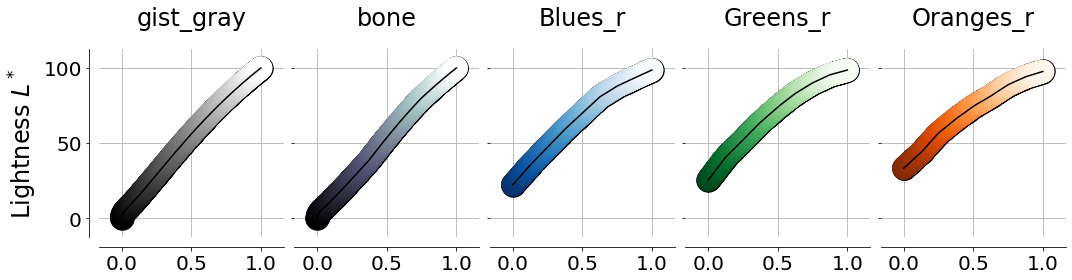

In [13]:
plot_L(['gist_gray', 'bone', 'Blues_r', 'Greens_r', 'Oranges_r'])

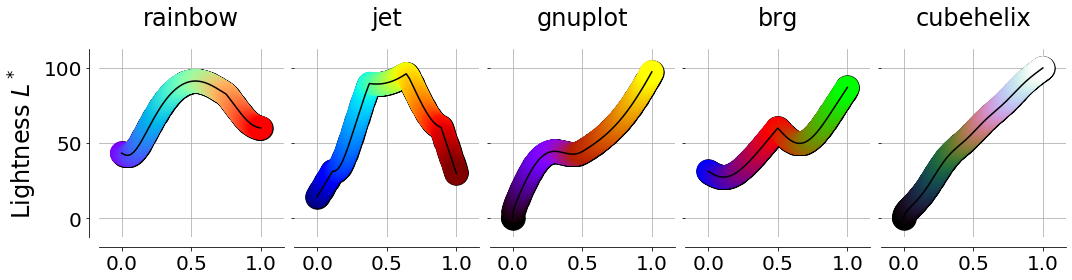

In [14]:
plot_L(["rainbow", "jet", "gnuplot", "brg", "cubehelix"], filename="L_rainbow")  